In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Loading and preprocessing data

The data is from a survey by [Najib El Mokhtari](https://www.facebook.com/najibm) posted in his [facebook page](https://www.facebook.com/najibm/posts/10165612576465078).

Data collected can be found [here](https://docs.google.com/spreadsheets/d/14hXDAgZuL0qWf52buHPDrnccLftDis1V8UeBbEGDOM4/edit?fbclid=IwAR06Lj3qDdkNAaTypU4yi-F3_gaunx_t_dINeGHmk_v4lLoajiEWz1bPJ2s#gid=1018944503)

In [2]:
data = pd.read_excel('bac.xlsx')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.head()

,Timestamp,grade,year,option,gender
0,2021-06-25 21:46:11,11.99,2019,علوم فيزيائية,ذكر
1,2021-06-25 21:46:46,13.51,2017,علوم التدبير المحاسباتي,ذكر
2,2021-06-25 21:47:02,10.66,2015,علوم الحياة والارض,ذكر
3,2021-06-25 21:47:04,17.76,2019,علوم الحياة والارض,ذكر
4,2021-06-25 21:47:10,14.88,2012,علوم رياضية أ A,ذكر


First, to avoid issues with plotting arabic (*If you already know a solution I would love to know about it*), let's change the option and gender from arabic to french.
There are also some missing values in the gender column, let's set the gender of those records to unspecified.

In [3]:
# data.option.unique().tolist()
option_ar = ['علوم فيزيائية',
 'علوم التدبير المحاسباتي',
 'علوم الحياة والارض',
 'علوم رياضية أ A',
 'علوم وتكنولوجيات كهربائية',
 'اداب',
 'علوم وتكنولوجيات ميكانيكية',
 'علوم انسانية',
 'علوم رياضية ب B',
 'علوم اقتصادية',
 'علوم شرعية',
 'علوم زراعية',
 'اللغة العربية',
 'فنون تطبيقية',
 'علوم تجريبية (الشعبة اللي ما بقاتش)']
option_fr = [
    'PhysChim',
    'SGestCompt',
    'SVieTerre',
    'SMathA',
    'STechElec',
    'LTR',
    'STechMecha',
    'SHumaine',
    'SMathB',
    'SEco',
    'SIslam',
    'SAgrono',
    'Arab',
    'ArtApp',
    'SExperim'
]
option_ar_fr = dict(zip(option_ar, option_fr))
data['option'] = data['option'].apply(lambda colname: option_ar_fr[colname])

In [4]:
gender_ar = ['ذكر', 'أنثى', 'يُفضل عدم التصريح']
gender_fr = ['Male', 'Female', 'Unspecified']
gender_mapper = {'Male': 0, 'Female': 1, 'Unspecified': 2}
gender_ar_fr = dict(zip(gender_ar, gender_fr))
data['gender'].fillna(gender_ar[-1], inplace=True)
data['gender'] = data['gender'].apply(lambda colname: gender_ar_fr[colname])

In [5]:
data.head()

,Timestamp,grade,year,option,gender
0,2021-06-25 21:46:11,11.99,2019,PhysChim,Male
1,2021-06-25 21:46:46,13.51,2017,SGestCompt,Male
2,2021-06-25 21:47:02,10.66,2015,SVieTerre,Male
3,2021-06-25 21:47:04,17.76,2019,SVieTerre,Male
4,2021-06-25 21:47:10,14.88,2012,SMathA,Male


## General statistics about the grades and majors

First things first, the min, average and max grades of 2021

In [6]:
data[data.year == 2021].grade.agg(['min', 'mean', 'max'])

min      6.620000
mean    14.324355
max     19.290000
Name: grade, dtype: float64

Let's also check these 3 statistics for each major for 2021

In [7]:
data[data.year == 2021].groupby('option').grade.agg(['min', 'mean', 'max'])

,min,mean,max
option,,,
ArtApp,14.33,14.330000,14.33
LTR,10.17,12.178750,14.36
PhysChim,6.62,14.597400,19.29
SEco,9.32,12.901250,16.29
SGestCompt,11.07,12.745000,16.38
SHumaine,10.53,14.230909,18.69
SMathA,11.91,15.156667,18.05
SMathB,10.89,15.666154,18.76
STechElec,14.06,16.140000,18.22


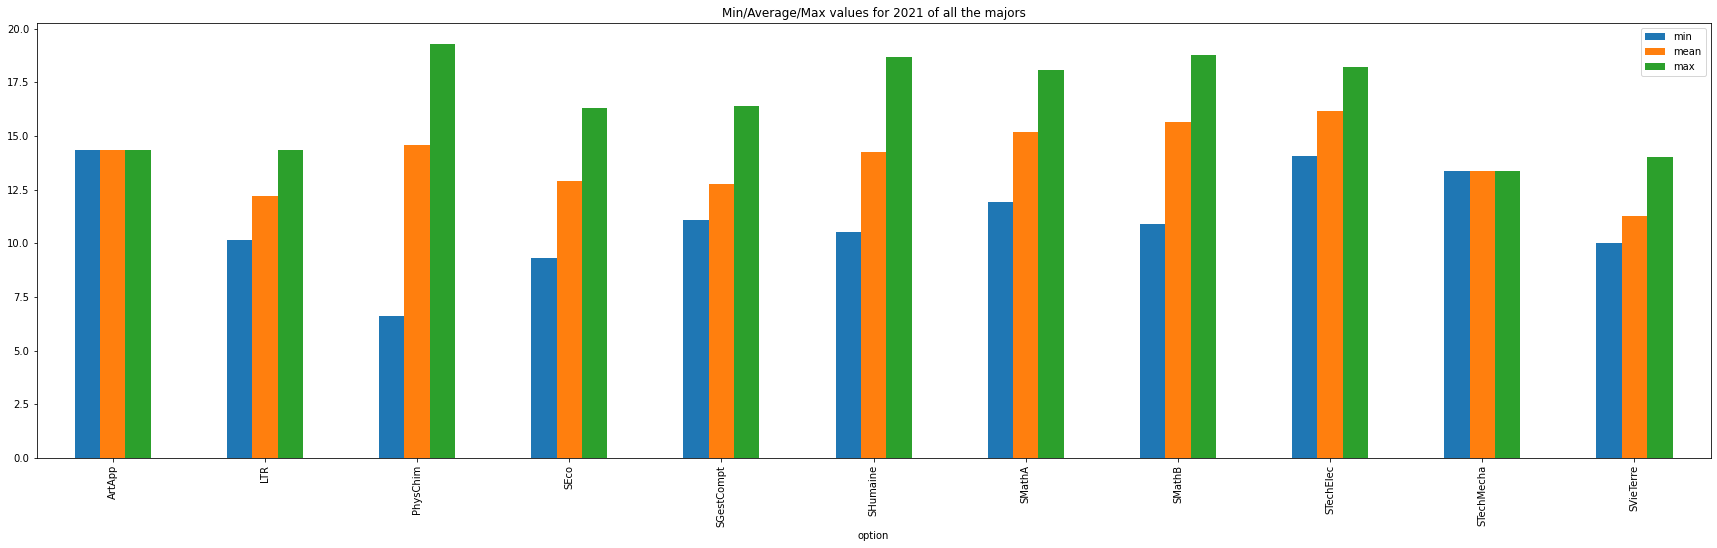

In [8]:
data[data.year == 2021].groupby(['option']).agg(['min', 'mean', 'max']).grade.plot.bar(figsize=(30,8), title="Min/Average/Max values for 2021 of all the majors");

Let's see what is the minimum, average and maximum values of the grades from each major over all the past years

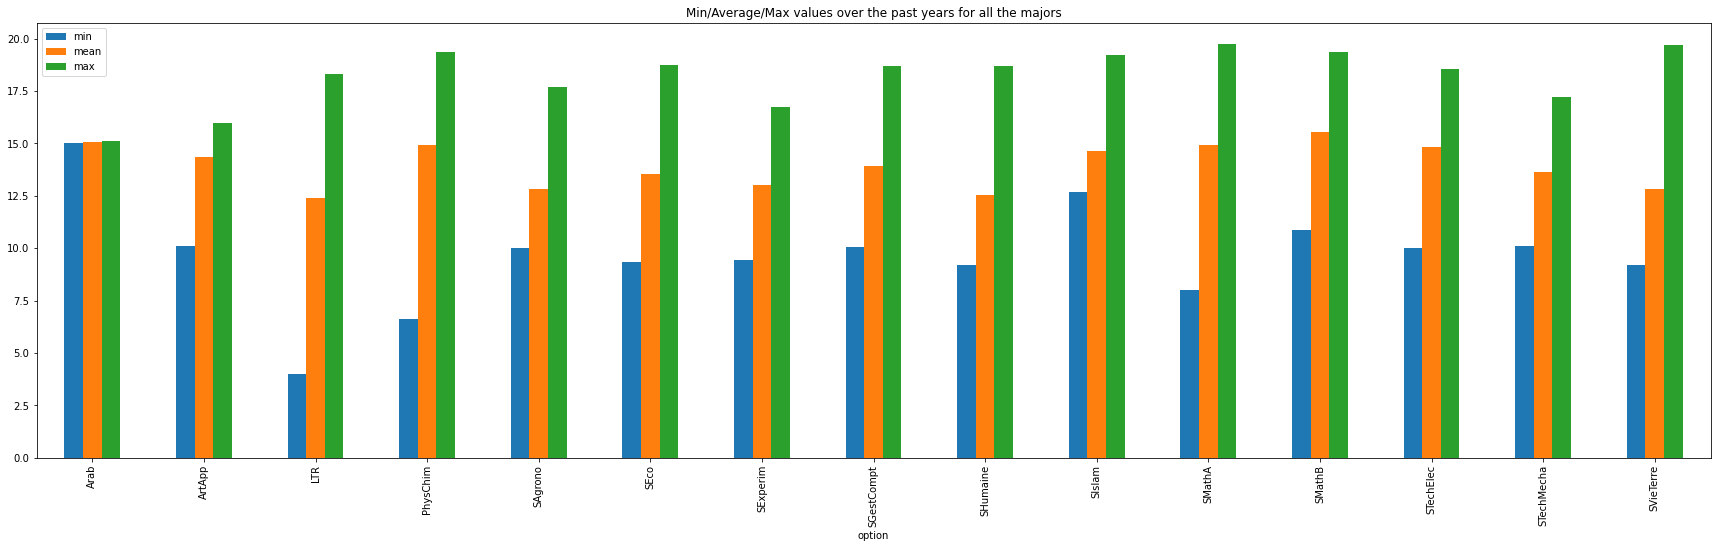

In [9]:
data.groupby(['option']).agg(['min', 'mean', 'max']).grade.plot.bar(figsize=(30,8), title="Min/Average/Max values over the past years for all the majors");

Let's also look at how many students we have from each major

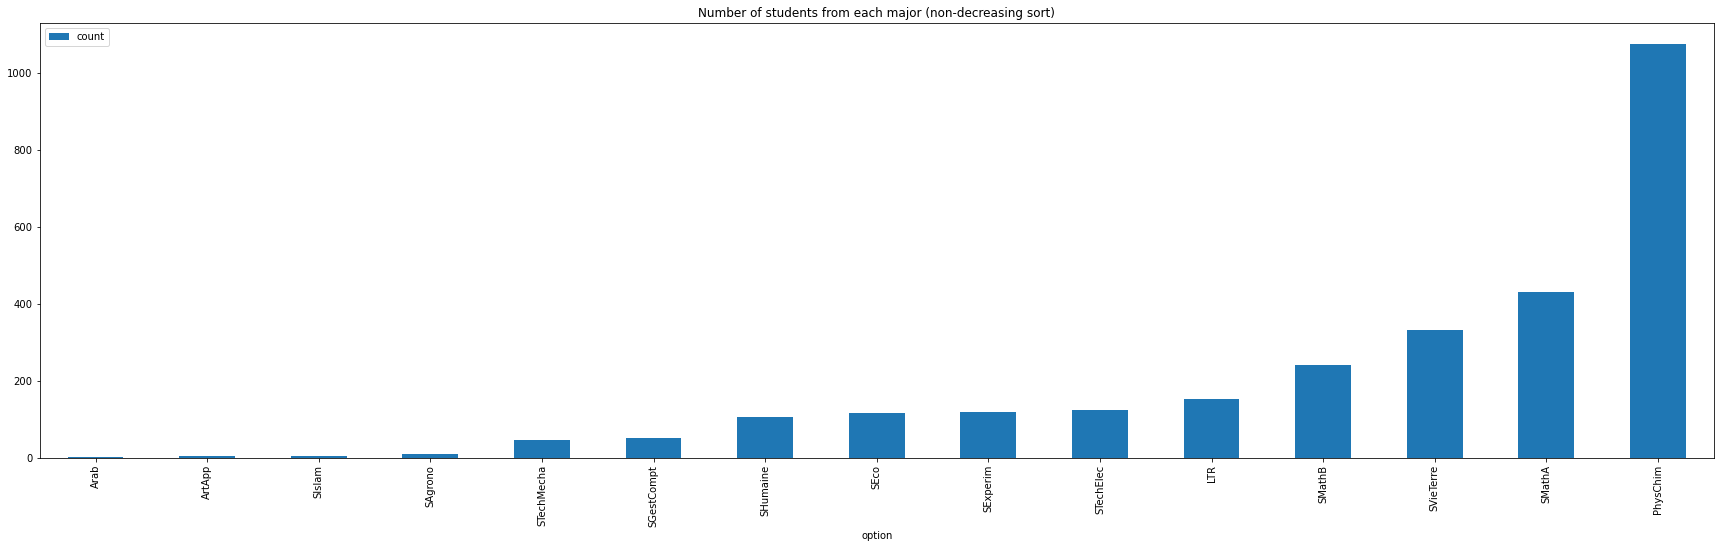

In [10]:
data.groupby(['option']).agg(['count']).grade.sort_values('count').plot.bar(figsize=(30,8), title="Number of students from each major (non-decreasing sort)");

In [11]:
arab = len(data[data.option == 'Arab'])
art_app = arab = len(data[data.option == 'ArtApp'])
s_islam = arab = len(data[data.option == 'SIslam'])
s_agro = arab = len(data[data.option == 'SAgrono'])
print("The number of students in the 4 majors with minimum number of students: ")
print(f"Arab: {arab}\nArt Appliqué: {art_app}\nScience Islamiques: {s_islam}\nScience Agronomiques: {s_agro}")

The number of students in the 4 majors with minimum number of students: 
Arab: 9
Art Appliqué: 5
Science Islamiques: 5
Science Agronomiques: 9


Let's see how the min/mean/max changes over the years for each major

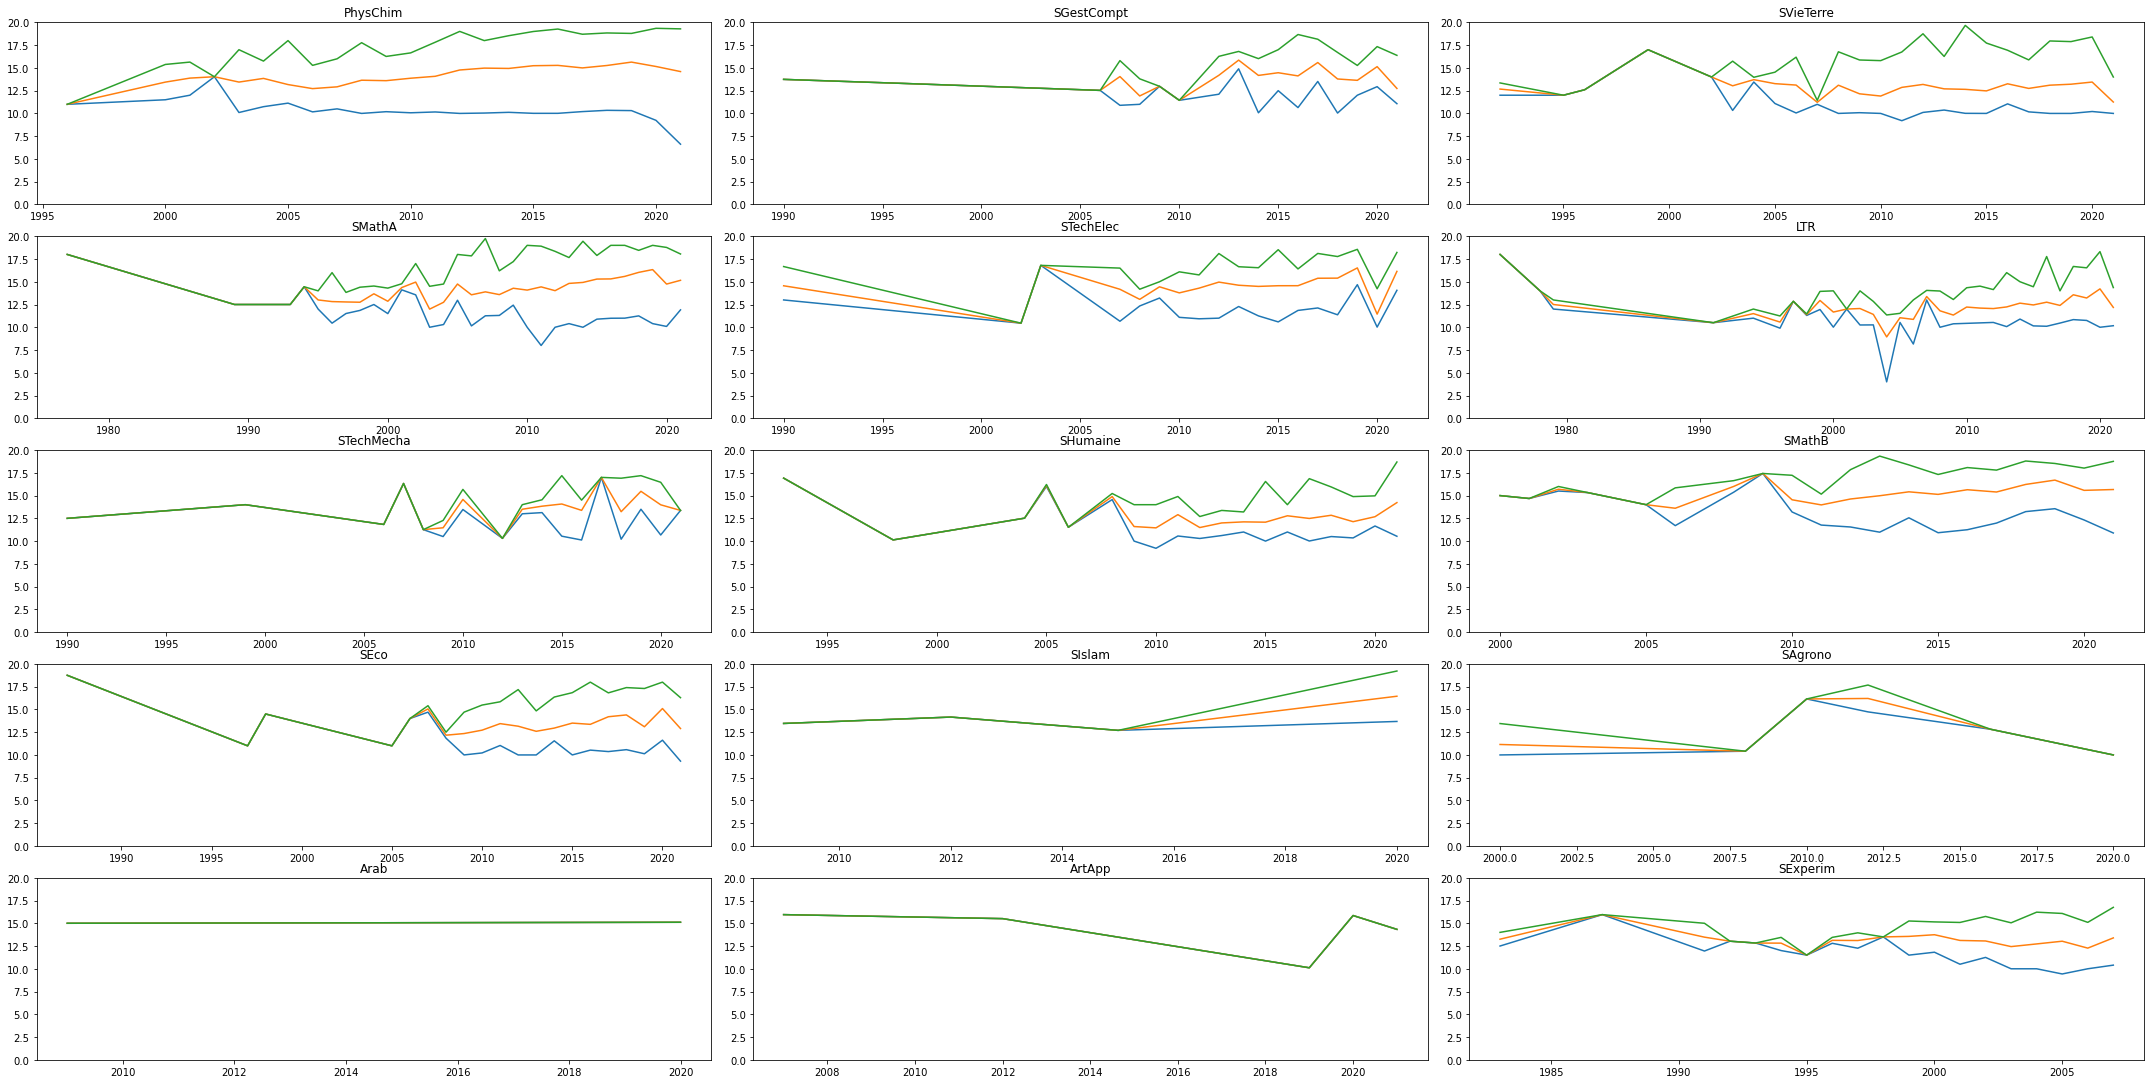

In [12]:
fig, ax = plt.subplots(5, 3, figsize=(30, 15))
fig.tight_layout()
for i, option in enumerate(option_fr):
    ax[i//3, i%3].plot(data.groupby(['option']).get_group(option).groupby('year').agg(['min', 'mean', 'max']))
    ax[i//3, i%3].set_title(option)
    ax[i//3, i%3].set_ylim(0, 20)

## What gender has the highest grade over the years

In this section, we will investigate how each gender performs over the years.

First, let's see the proportion of each gender in all the data we have

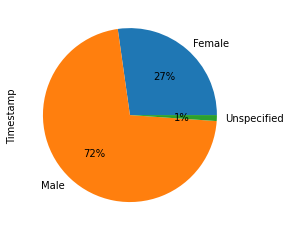

In [13]:
data.groupby('gender').count()['Timestamp'].plot.pie(autopct='%1.0f%%');

From the the statistics below, it looks like females have a high mean value for the grade and also a smaller standard deviation. They also have the highest grade over all the years.

In [14]:
data.groupby('gender')['grade'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,767.0,15.146076,2.150911,8.0,13.79,15.42,16.8350,19.29
Male,2018.0,13.988087,2.375723,4.0,12.00,14.00,15.8875,19.75
Unspecified,31.0,14.375806,2.828492,10.0,11.79,14.78,15.8850,19.22


Let's look at the mean value of the grades for each gender over the years.

It looks like females in Morocco have high mean value.

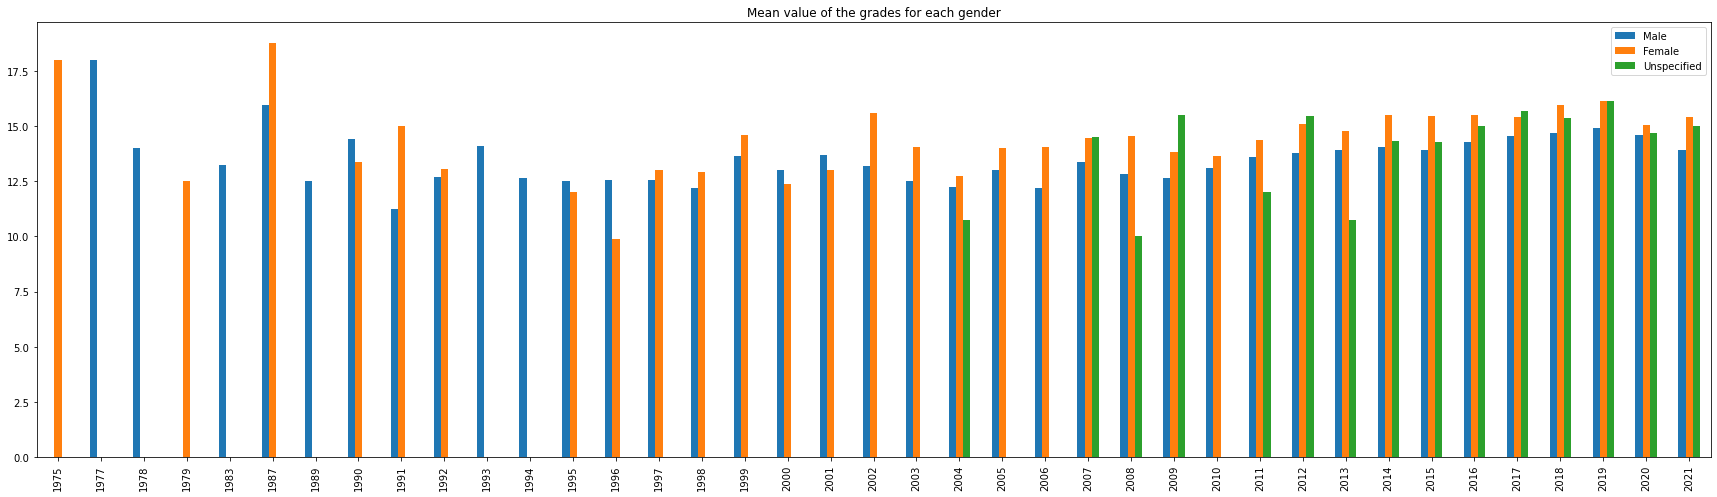

In [15]:
gender_grades_over_years = dict()
for key,item in data.groupby('year'):
    serie = item.groupby('gender')['grade'].mean()
    gender_grades_over_years[key] = gender_grades_over_years.get(key, [None, None, None])
    for g in serie.keys():
        gender_grades_over_years[key][gender_mapper[g]] = serie[g]
pd.DataFrame.from_dict(gender_grades_over_years, orient='index', columns=gender_fr).plot.bar(figsize=(30,8), title="Mean value of the grades for each gender");

Another interesting question is which gender has the max grade of the year.

Even though females have a high mean/expected value for the grades compared to males, it looks like the first grade is mainly dominated by males (But again, the number of males in this data is much higher, so this is kind of expected)

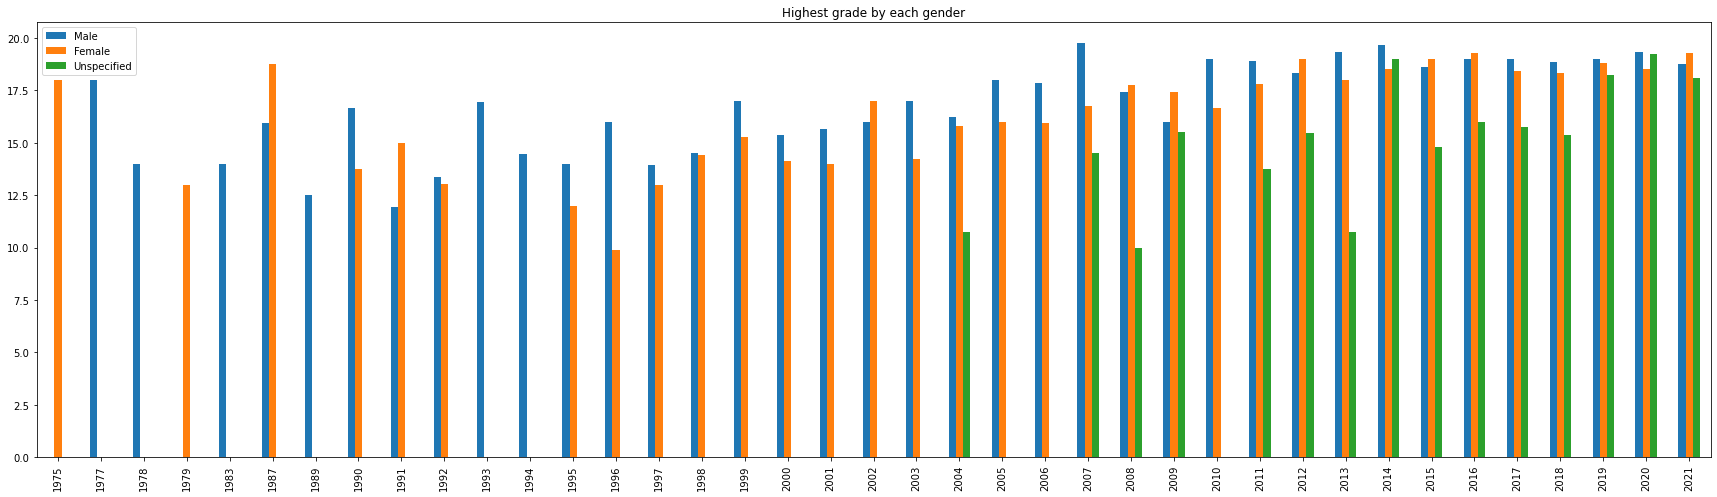

In [16]:
gender_grades_over_years = dict()
for key,item in data.groupby('year'):
    serie = item.groupby('gender')['grade'].max()
    gender_grades_over_years[key] = gender_grades_over_years.get(key, [None, None, None])
    for g in serie.keys():
        gender_grades_over_years[key][gender_mapper[g]] = serie[g]
pd.DataFrame.from_dict(gender_grades_over_years, orient='index', columns=gender_fr).plot.bar(figsize=(30, 8), title="Highest grade by each gender");

For a fair comparison over the years, let's plot the number of students from each gender over the years. It is clear that the number of male students is significantly larger than the number of females.

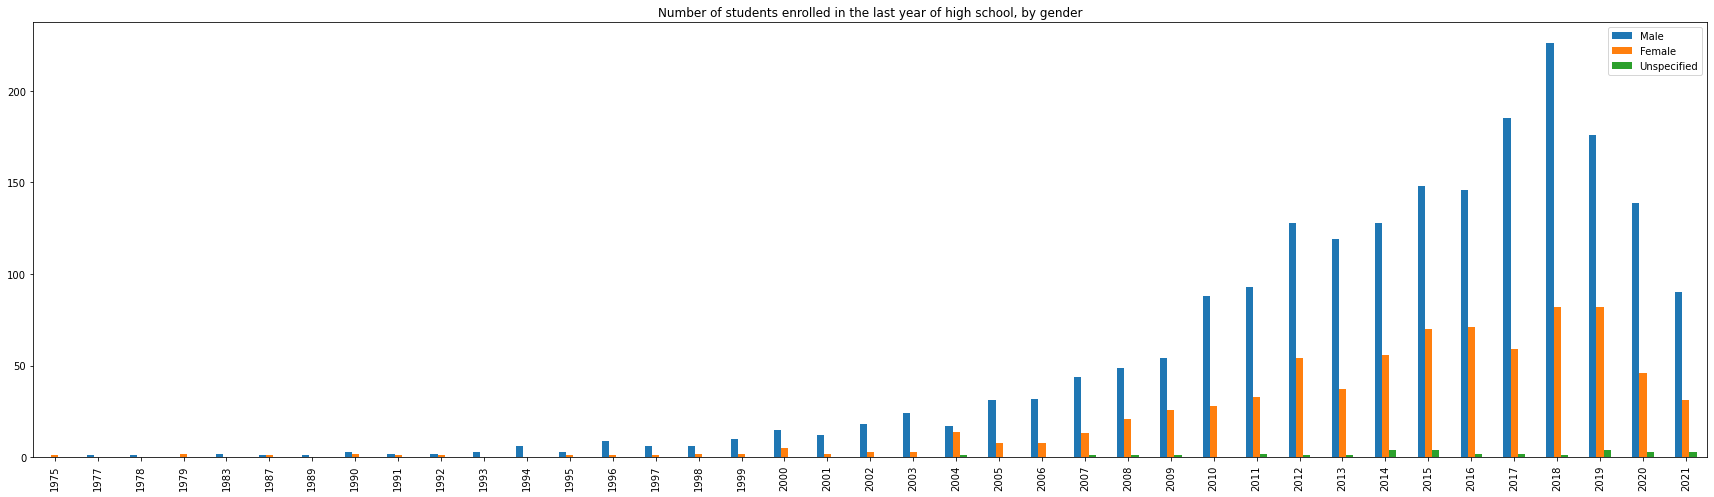

In [17]:
gender_grades_over_years = dict()
for key,item in data.groupby('year'):
    serie = item.groupby('gender')['grade'].count()
    gender_grades_over_years[key] = gender_grades_over_years.get(key, [0, 0, 0])
    for g in serie.keys():
        gender_grades_over_years[key][gender_mapper[g]] = serie[g]
pd.DataFrame.from_dict(gender_grades_over_years, orient='index', columns=gender_fr).plot.bar(figsize=(30, 8),
                                                                                             title="Number of students enrolled in the last year of high school, by gender");

**Questions**
1. *Is this gap of gender a bias in the data ?*
2. *or is it a good approximation of the true numbers of students enrolled in the last year of high school ?*
3. *If it is the case, does really Morocco have more males than females ?*

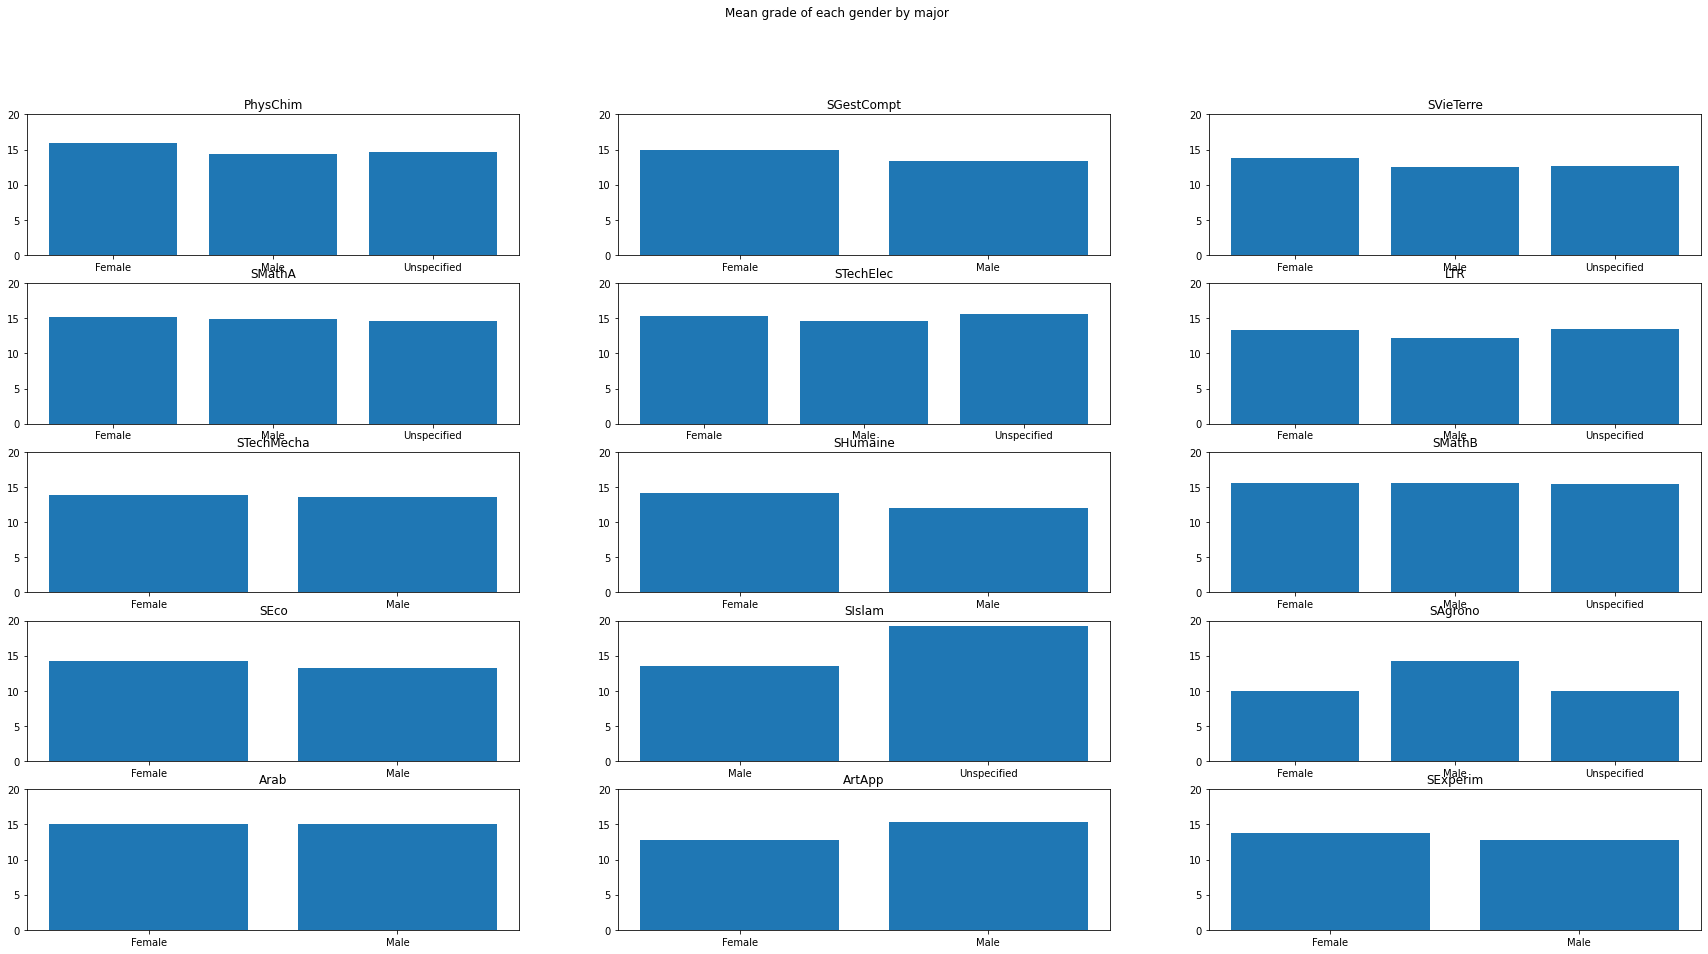

In [18]:
fig, ax = plt.subplots(5, 3, figsize=(30, 15))
# fig.tight_layout()
for i, option in enumerate(option_fr):
    grouped = data.groupby(['option']).get_group(option).groupby('gender').grade.mean()
    keys = grouped.keys()
    ax[i//3, i%3].set_title(option)
    ax[i//3, i%3].bar(keys, grouped)
    ax[i//3, i%3].set_ylim(0, 20)
fig.suptitle("Mean grade of each gender by major");